In [1]:
# import matplotlib.pyplot as plt# type: ignore
# import torch# type: ignore
# import torchio as tio# type: ignore
# import os
# import seaborn as sns #type: ignore
# from tqdm import tqdm #type: ignore
# import pandas as pd #type:ignore


# import random
# import math
# from diffdrr.drr import DRR# type: ignore
# from diffdrr.visualization import plot_drr # type: ignore
# from diffdrr.data import read# type: ignore
# from diffdrr.pose import convert # type: ignore
# from diffdrr.registration import Registration # type: ignore
# import numpy as np# type: ignore
# from diffdrr.metrics import NormalizedCrossCorrelation2d # type: ignore

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# input_folder = "Data/segmented_data/artemis_femur/"
# # output_folder = "/Data/segmented_data/artemis_femur"
# filenames = sorted(os.listdir(input_folder))
# plt.figure()
# i = 0
# rotations = torch.tensor([[0.0, 0.0, 0.0]], device=device)
# translations = torch.tensor([[0.0, 2300.0, -290.0]], device=device)
# image = filenames[0]
# img = tio.ScalarImage(os.path.join(input_folder, image))
# bounds = img.get_bounds()
# width = int(abs(bounds[1][1] - bounds[1][0])) + 120
# height = int((abs(bounds[2][1] - bounds[2][0]) + 150) ) 
# print(width, height)
# sub = read(
#     volume=img,
#     orientation="AP",
#     bone_attenuation_multiplier=9.0,
# )

# subject = tio.Subject(sub)

# drr = DRR(
#     subject,  # A torchio.Subject object storing the CT volume, origin, and voxel spacing
#     sdd=2560,  # Source-to-detector distance (i.e., the C-arm's focal length)
#     height=height,
#     width=width,  # Height of the DRR (if width is not seperately provided, the generated image is square)
#     delx=2,  # Pixel spacing (in mm)
# ).to(device)
# # Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)


# # print(image)
    
    
#     # rotations[0][1] =   random.uniform(-5, 5) * math.pi / 180
#     # print(bounds)
#     # width = int(
#     #     (abs(bounds[0][1] - bounds[0][0])) + abs(bounds[1][1] - bounds[1][0] / 2)
#     # )
    
    
# img = drr(
#     rotations,
#     translations,
#     parameterization="euler_angles",
#     convention="ZXY",
# )
# # half_height = img.shape[2] // 2
# # img = img[:, :, :half_height]
# plot_drr(img, ticks=False)
# # torch.save(img, os.path.join(output_folder, f"DRR_torch_{i}"))
# # print(img)
# # plt.show()
# # pose = convert(
# #     rotations, translations, parameterization="euler_angles", convention="ZXY"
# # )
# ground_truth = img
# image = image.replace(".nii.gz", "")
# # imgs = []
# # n_points = [200, 400, 600, 800, 1000]
# # for n in n_points:
# #     img = drr(pose, n_points=n)
# #     imgs.append(img)
# # fig, axs = plt.subplots(1, 4, figsize=(14, 7), dpi=300, tight_layout=True)
# # img = torch.concat(imgs)
# # axs = plot_drr(img, ticks=False, title=[f"n_points={n}" for n in n_points], axs=axs)
# plt.savefig(f"Data/test/img_{image}_{i}.png")
# plt.show()
import torch
from PIL import Image, ImageOps
import torchvision.transforms as transforms

# Read a PIL image
image = Image.open('Data/XrayANON5UB95J1SC_full.png')
image = ImageOps.grayscale(image) 

# Define a transform to convert PIL 
# image to a Torch tensor
transform = transforms.Compose([
    transforms.PILToTensor()
])

# transform = transforms.PILToTensor()
# Convert the PIL image to Torch tensor
img_tensor = transform(image).unsqueeze(1)
# img_tensor = (img_tensor/255)
img_tensor = img_tensor.float()
# print the converted Torch tensor


FileNotFoundError: [Errno 2] No such file or directory: '/home/yabdelrahman/Pytorch_Code (1)/Pytorch_Code/code_yassin/Data/XrayANON5UB95J1SC_full.png'

<Figure size 640x480 with 0 Axes>

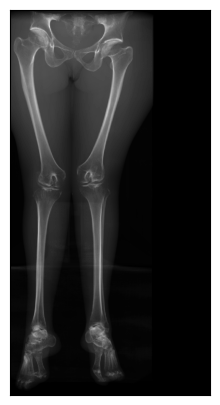

In [4]:
import matplotlib.pyplot as plt# type: ignore
import torch# type: ignore
import torchio as tio# type: ignore
import os
import seaborn as sns #type: ignore
from tqdm import tqdm #type: ignore
import pandas as pd #type:ignore


import random
import math
from diffdrr.drr import DRR# type: ignore
from diffdrr.visualization import plot_drr # type: ignore
from diffdrr.data import read# type: ignore
from diffdrr.pose import convert # type: ignore
from diffdrr.registration import Registration # type: ignore
import numpy as np# type: ignore
from diffdrr.metrics import NormalizedCrossCorrelation2d # type: ignore

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_folder = "Data/XCT_pairs"
# output_folder = "/Data/segmented_data/artemis_femur"
filenames = sorted(os.listdir(input_folder))
plt.figure()
i = 0
rotations = torch.tensor([[0.0, 0.0, 0.0]], device=device)
translations = torch.tensor([[-80.0, 2500.0, 0.0]], device=device)
image = filenames[0]
img = tio.ScalarImage(os.path.join(input_folder, image))
# bounds = img.get_bounds()
# # width = int(abs(bounds[1][1] - bounds[1][0])) + 120
# # height = int((abs(bounds[2][1] - bounds[2][0]) + 150) ) 
width = 456
height = 876
# print(width, height)
sub = read(
    volume=img,
    orientation="AP",
    bone_attenuation_multiplier=9.0,
)

subject = tio.Subject(sub)

drr = DRR(
    subject,  # A torchio.Subject object storing the CT volume, origin, and voxel spacing
    sdd=2560,  # Source-to-detector distance (i.e., the C-arm's focal length)
    height=height,
    width=width,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=1,  # Pixel spacing (in mm)
).to(device)
# Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)


# print(image)
    
    
    # rotations[0][1] =   random.uniform(-5, 5) * math.pi / 180
    # print(bounds)
    # width = int(
    #     (abs(bounds[0][1] - bounds[0][0])) + abs(bounds[1][1] - bounds[1][0] / 2)
    # )
    
    
img = drr(
    rotations,
    translations,
    parameterization="euler_angles",
    convention="ZXY",
)
# half_height = img.shape[2] // 2
# img = img[:, :, :half_height]
plot_drr(img, ticks=False)
# torch.save(img, os.path.join(output_folder, f"DRR_torch_{i}"))
# print(img)
# plt.show()
# pose = convert(
#     rotations, translations, parameterization="euler_angles", convention="ZXY"
# )
ground_truth = img
image = image.replace(".nii.gz", "")
# imgs = []
# n_points = [200, 400, 600, 800, 1000]
# for n in n_points:
#     img = drr(pose, n_points=n)
#     imgs.append(img)
# fig, axs = plt.subplots(1, 4, figsize=(14, 7), dpi=300, tight_layout=True)
# img = torch.concat(imgs)
# axs = plot_drr(img, ticks=False, title=[f"n_points={n}" for n in n_points], axs=axs)
plt.savefig(f"Data/test/img_{image}_{i}.png")
plt.show()
# print(img_tensor.shape)
# img_tensor = img_tensor.float()

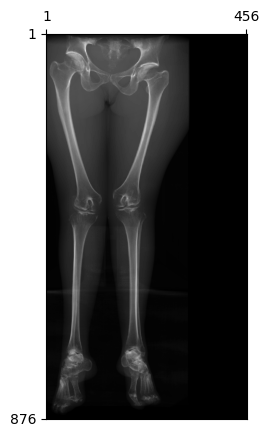

(tensor([[-0., 0., -0.]]), tensor([[ -80., 2500.,    0.]]))

In [11]:

SDD = 2560
height = 876
width = 456
true_params = {
    "sdr": SDD,
    "alpha": 0.0,
    "beta": 0.0,
    "gamma": 0.0,
    "bx": -80.0,
    "by": 2500.0,
    "bz": 0.0,
}

def pose_from_carm(sid, tx, ty, alpha, beta, gamma):
    rot = torch.tensor([[alpha, beta, gamma]])
    xyz = torch.tensor([[tx, sid, ty]])
    return convert(rot, xyz, parameterization="euler_angles", convention="ZXY")


# def get_initial_parameters(true_params):
#     alpha = true_params["alpha"] + np.random.uniform(-np.pi / 4, np.pi / 4)
#     beta = true_params["beta"] + np.random.uniform(-np.pi / 4, np.pi / 4)
#     gamma = true_params["gamma"] + np.random.uniform(-np.pi / 4, np.pi / 4)
#     bx = true_params["bx"] + np.random.uniform(-30.0, 30.0)
#     by = true_params["by"] + np.random.uniform(-30.0, 30.0)
#     bz = true_params["bz"] + np.random.uniform(-30.0, 30.0)
#     pose = pose_from_carm(by, bx, bz, alpha, beta, gamma).to(device)
#     rotations, translations = pose.convert("euler_angles", "ZXY")
#     return rotations, translations, pose

def get_initial_parameters(true_params):
    alpha = true_params["alpha"] 
    beta = true_params["beta"] 
    gamma = true_params["gamma"] 
    bx = true_params["bx"] 
    by = true_params["by"] 
    bz = true_params["bz"]
    pose = pose_from_carm(by, bx, bz, alpha, beta, gamma).to(device)
    rotations, translations = pose.convert("euler_angles", "ZXY")
    return rotations, translations, pose



rotations, translations, pose = get_initial_parameters(true_params)
drr = DRR(subject, sdd=SDD, height=height,width=width, delx=1).to(device)
with torch.no_grad():
    est = drr(pose)
    # half_height = est.shape[2] // 2
    # est = est[:, :, :half_height]
plot_drr(est)
plt.savefig(f"Data/test/img_moving.png")
plt.show()

rotations, translations

In [12]:

criterion = NormalizedCrossCorrelation2d()
img_tensor = img_tensor.float()
criterion(img_tensor, est).item()


0.3125612735748291

In [17]:
def optimize(
    reg: Registration,
    ground_truth,
    lr_rotations=5e-2,
    lr_translations=1e2,
    momentum=0,
    dampening=0,
    n_itrs=500,
    optimizer="sgd",  # 'sgd' or `adam`
):
    # Initialize an optimizer with different learning rates
    # for rotations and translations since they have different scales
    if optimizer == "sgd":
        optim = torch.optim.SGD(
            [
                {"params": [reg._rotation], "lr": lr_rotations},
                {"params": [reg._translation], "lr": lr_translations},
            ],
            momentum=momentum,
            dampening=dampening,
            maximize=True,
        )
        optimizer = optimizer.upper()
    elif optimizer == "adam":
        optim = torch.optim.Adam(
            [
                {"params": [reg._rotation], "lr": lr_rotations},
                {"params": [reg._translation], "lr": lr_translations},
            ],
            maximize=True,
        )
        optimizer = optimizer.title()
    else:
        raise ValueError(f"Unrecognized optimizer {optimizer}")

    params = []
    losses = [criterion(ground_truth, reg()).item()]
    for itr in (pbar := tqdm(range(n_itrs), ncols=100)):
        # Save the current set of parameters
        alpha, beta, gamma = reg.rotation.squeeze().tolist()
        bx, by, bz = reg.translation.squeeze().tolist()
        params.append([i for i in [alpha, beta, gamma, bx, by, bz]])
        if itr % 5 == 2:
            df = pd.DataFrame(params, columns=["alpha", "beta", "gamma", "bx", "by", "bz"])
            df["loss"] = losses
            df.to_pickle("params_adam.pickle")
        # Run the optimization loop
        optim.zero_grad()
        estimate = reg()
        loss = criterion(ground_truth, estimate)
        loss.backward()
        optim.step()
        losses.append(loss.item())
        pbar.set_description(f"NCC = {loss.item():06f}")

        # Stop the optimization if the estimated and ground truth images are 99.9% correlated
        if loss > 0.999:
            if momentum != 0:
                optimizer += " + momentum"
            if dampening != 0:
                optimizer += " + dampening"
            tqdm.write(f"{optimizer} converged in {itr + 1} iterations")
            break

    # Save the final estimated pose
    alpha, beta, gamma = reg.rotation.squeeze().tolist()
    bx, by, bz = reg.translation.squeeze().tolist()
    params.append([i for i in [alpha, beta, gamma, bx, by, bz]])

    df = pd.DataFrame(params, columns=["alpha", "beta", "gamma", "bx", "by", "bz"])
    df["loss"] = losses
    return df

In [14]:
# Keyword arguments for diffdrr.drr.DRR
kwargs = {
    "subject": subject,
    "sdd": SDD,
    "height": height,
    "width" : width,
    "delx": 2,
    "stop_gradients_through_grid_sample": True,  # Enables faster optimization
}

In [15]:
def optimize_lbfgs(
    reg: Registration,
    ground_truth,
    lr,
    line_search_fn=None,
    n_itrs=500,
):
    # Initialize the optimizer and define the closure function
    optim = torch.optim.LBFGS(reg.parameters(), lr, line_search_fn=line_search_fn)

    def closure():
        if torch.is_grad_enabled():
            optim.zero_grad()
        estimate = reg()
        loss = -criterion(ground_truth, estimate)
        if loss.requires_grad:
            loss.backward()
        return loss

    params = []
    losses = [closure().abs().item()]
    for itr in (pbar := tqdm(range(n_itrs), ncols=100)):
        # Save the current set of parameters
        alpha, beta, gamma = reg.rotation.squeeze().tolist()
        bx, by, bz = reg.translation.squeeze().tolist()
        params.append([i for i in [alpha, beta, gamma, bx, by, bz]])

        # Run the optimization loop
        optim.step(closure)
        with torch.no_grad():
            loss = closure().abs().item()
            losses.append(loss)
            pbar.set_description(f"NCC = {loss:06f}")

        # Stop the optimization if the estimated and ground truth images are 99.9% correlated
        if loss > 0.999:
            if line_search_fn is not None:
                method = f"L-BFGS + strong Wolfe conditions"
            else:
                method = "L-BFGS"
            tqdm.write(f"{method} converged in {itr + 1} iterations")
            break

    # Save the final estimated pose
    alpha, beta, gamma = reg.rotation.squeeze().tolist()
    bx, by, bz = reg.translation.squeeze().tolist()
    params.append([i for i in [alpha, beta, gamma, bx, by, bz]])

    df = pd.DataFrame(params, columns=["alpha", "beta", "gamma", "bx", "by", "bz"])
    df["loss"] = losses
    return df

In [10]:
# Base SGD
drr = DRR(**kwargs).to(device)
reg = Registration(
    drr,
    rotations.clone(),
    translations.clone(),
    parameterization="euler_angles",
    convention="ZXY",
)
params_base = optimize(reg, ground_truth)
params_base.to_pickle("params_base.pickle")
del drr



NCC = 0.632620: 100%|███████████████████████████████████████████| 500/500 [3:33:15<00:00, 25.59s/it]


In [11]:
# SGD + momentum
drr = DRR(**kwargs).to(device)
reg = Registration(
    drr,
    rotations.clone(),
    translations.clone(),
    parameterization="euler_angles",
    convention="ZXY",
)
params_momentum = optimize(reg, ground_truth, momentum=5e-1)
params_momentum.to_pickle("params_momentum.pickle")

del drr



NCC = 0.626536:  41%|████████████████▉                        | 206/500 [1:29:38<2:08:17, 26.18s/it]

In [ ]:
# SGD + momentum + dampening
drr = DRR(**kwargs).to(device)
reg = Registration(
    drr,
    rotations.clone(),
    translations.clone(),
    parameterization="euler_angles",
    convention="ZXY",
)
params_momentum_dampen = optimize(reg, ground_truth, momentum=5e-1, dampening=1e-4)
params_momentum_dampen.to_pickle("params_momentum_dampen.pickle")

del drr



In [18]:
# Adam
drr = DRR(**kwargs).to(device)
reg = Registration(
    drr,
    rotations.clone(),
    translations.clone(),
    parameterization="euler_angles",
    convention="ZXY",
)
params_adam = optimize(reg, img_tensor, 1e-1, 5e0, optimizer="adam")
params_adam.to_pickle("params_adam.pickle")

del drr



NCC = 0.570955:  10%|████▎                                       | 49/500 [41:12<6:46:03, 54.02s/it]

In [13]:
# L-BFGS
drr = DRR(**kwargs).to(device)
reg = Registration(
    drr,
    rotations.clone(),
    translations.clone(),
    parameterization="euler_angles",
    convention="ZXY",
)
params_lbfgs = optimize_lbfgs(reg, img_tensor, lr=3e-1)
params_lbfgs.to_pickle("params_lbfgs.pickle")

del drr



NCC = 0.000000:  48%|███████████████████▊                     | 242/500 [3:47:20<4:02:22, 56.36s/it]


KeyboardInterrupt: 

In [ ]:
from base64 import b64encode

from IPython.display import HTML, display

from diffdrr.visualization import animate

MAX_LENGTH = max(
    map(
        len,
        [
            params_base,
            params_momentum,
            params_momentum_dampen,
            params_adam,
            params_lbfgs,
            params_lbfgs_wolfe,
        ],
    )
)
drr = DRR(subject, sdd=SDD, height=HEIGHT, delx=DELX).to(device)


def animate_in_browser(df, skip=1, max_length=MAX_LENGTH, duration=30):
    if max_length is not None:
        n = max_length - len(df)
        df = pd.concat([df, df.iloc[[-1] * n]]).iloc[::skip]
    else:
        pass

    out = animate(
        "<bytes>",
        df,
        drr,
        ground_truth=ground_truth,
        verbose=True,
        device=device,
        extension=".webp",
        duration=duration,
        parameterization="euler_angles",
        convention="ZXY",
    )
    display(HTML(f"""<img src='{"data:img/gif;base64," + b64encode(out).decode()}'>"""))

NameError: name 'params_adam' is not defined